Run 1: Weights=[1.36110276 0.33040145], Bias=0.8429467711298867


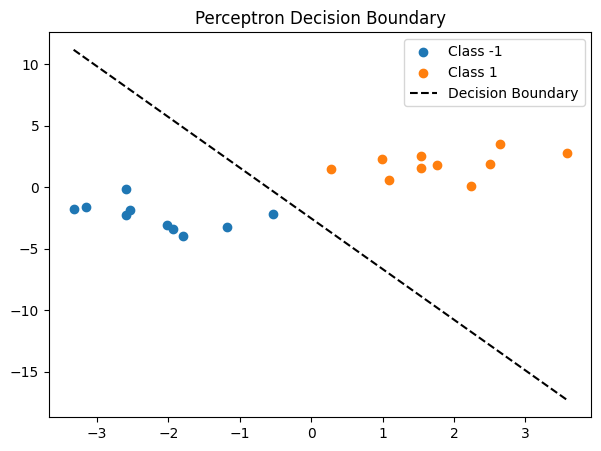

Run 2: Weights=[0.25745788 1.88943309], Bias=-0.7420954486792464


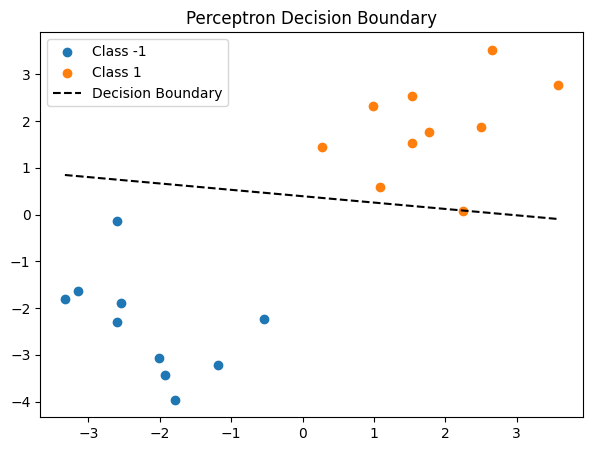

Run 3: Weights=[0.1623895  0.44699079], Bias=0.41269321936717285


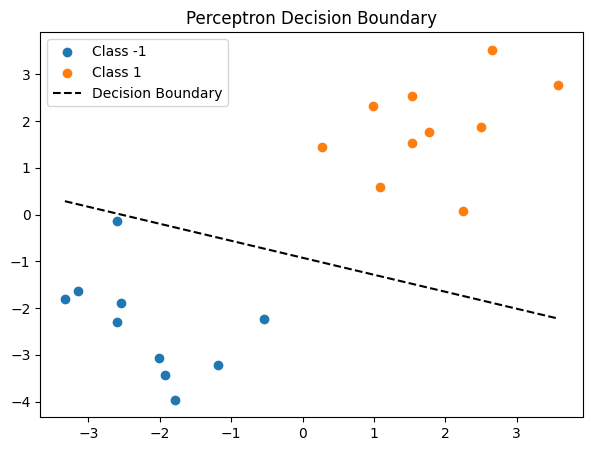

In [6]:
#answer 7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("A4_P1.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == 0, -1, 1)

def perceptron_train(X, y, learning_rate=0.01, epochs=20):
    np.random.seed()
    weights = np.random.randn(X.shape[1])
    bias = np.random.randn()
    for _ in range(epochs):
        for i in range(len(X)):
            activation = np.dot(X[i], weights) + bias
            prediction = 1 if activation >= 0 else -1
            update = learning_rate * (y[i] - prediction)
            weights += update * X[i]
            bias += update
    return weights, bias

def plot_boundary(X, y, weights, bias):
    plt.figure(figsize=(7, 5))
    for label in np.unique(y):
        plt.scatter(*X[y == label].T, label=f"Class {label}")
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.show()

for i in range(3):
    w, b = perceptron_train(X, y)
    print(f"Run {i+1}: Weights={w}, Bias={b}")
    plot_boundary(X, y, w, b)


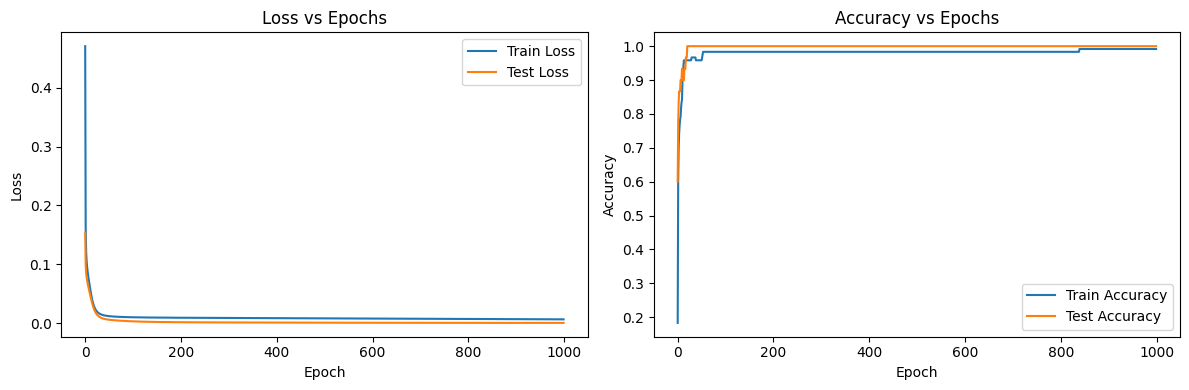

In [5]:
#answer 8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def tanh(x): return np.tanh(x)
def dtanh(x): return 1 - np.tanh(x) ** 2
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)
def dmse(y_true, y_pred): return (y_pred - y_true)

np.random.seed(42)
input_dim = X_train.shape[1]
hidden_dim = 5
output_dim = y_train.shape[1]

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

epochs = 1000
lr = 0.01
train_loss, test_loss = [], []
train_acc, test_acc = [], []

for epoch in range(epochs):
    Z1 = X_train @ W1 + b1
    A1 = tanh(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)

    loss = mse(y_train, A2)
    train_loss.append(loss)
    acc = np.mean(np.argmax(A2, axis=1) == np.argmax(y_train, axis=1))
    train_acc.append(acc)

    dZ2 = dmse(y_train, A2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = dZ2 @ W2.T * dtanh(Z1)
    dW1 = X_train.T @ dA1
    db1 = np.sum(dA1, axis=0, keepdims=True)

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    Z1_test = X_test @ W1 + b1
    A1_test = tanh(Z1_test)
    Z2_test = A1_test @ W2 + b2
    A2_test = softmax(Z2_test)

    test_loss.append(mse(y_test, A2_test))
    test_acc.append(np.mean(np.argmax(A2_test, axis=1) == np.argmax(y_test, axis=1)))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
